### Preprocess for job_scrapped_2

In [1]:
import string, re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(0)

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('job_scrapped_2.csv')

In [3]:
df2 = df.copy()

In [4]:
# salary_df = df2[df2['Salary']!= 'None']
salary_df =df2.replace('None',0) # fill all none value with 0
salary_df.shape

(963, 6)

In [5]:
salary_list = salary_df['Salary'].unique().tolist()

In [6]:

def salary_base(x):
    y=""
    if "year" in str(x):
        y = "Yearly"
    if "hour" in str(x):
        y = "Hourly"
    if "day" in str(x):
        y = "Daily"
    elif "month" in str(x):
        y = "Monthly"
    
    return y

In [7]:
salary_df['Rate_by'] = salary_df['Salary'].apply(salary_base)

In [8]:
salary_df = salary_df[salary_df['Rate_by']!=""]
salary_df = salary_df.reset_index(drop=True)

In [9]:
salary_df.groupby('Rate_by').Salary.count()

Rate_by
Daily        1
Hourly     294
Monthly     31
Yearly     637
Name: Salary, dtype: int64

In [10]:
salary_df.shape

(963, 7)

In [11]:
salary_df[['low','high']] = salary_df.Salary.str.split('-', expand=True)
salary_df[['Rate_by','low','high']]

,Rate_by,low,high
0,Yearly,"Up to $215,000 a year",None
1,Yearly,"$60,000 a year",None
2,Hourly,$20,$25 an hour
3,Yearly,"$70,000","$85,000 a year"
4,Hourly,$45,$55 an hour
...,...,...,...
958,Yearly,"$108,000","$118,000 a year"
959,Yearly,"$89,000","$99,000 a year"
960,Yearly,"$89,000","$99,000 a year"
961,Yearly,"$80,000","$90,000 a year"


In [12]:
a = "$108,000" 
# b = "From $10,00,000 a year a year" 

pattern = '\$[0-9]*[.,]?[0-9]*'
p = re.compile(pattern)
digits = p.findall(a)
print(digits)

['$108,000']


In [13]:
salary_df.replace(to_replace=[None], value=0, inplace=True)

In [14]:
def find_salary(a):
    if a:
        pattern = '\$[0-9]*[.,]?[0-9]*'
        p = re.compile(pattern)
        digits = p.findall(a)
        new1 = digits[0].replace("$","")
        new2 = new1.replace(",","")
        
        return float(new2)
    else:
        return 0

In [15]:
salary_df['min'] = salary_df['low'].apply(find_salary)

In [16]:
salary_df['max'] = salary_df['high'].apply(find_salary)

In [17]:
#Calculate average salary
def adjust_salary(a, b):
    adjusted_salary=[]
    for x, y in zip(a,b):
        if y > 0:
            avg_salary = (x+y)/2
        
        else:
            avg_salary = x
            
        adjusted_salary.append(avg_salary)
        
    return adjusted_salary

In [18]:
salary_df['adjusted_salary'] = adjust_salary(salary_df['min'], salary_df['max'])

In [19]:

#turn hourly, daily and monthly wage to yearly 
def adjust_salary2(m,n):
    adjusted_yearly_salary = []
    for x, y in zip(m,n):
        if x == "Yearly":
            yearly_salary = y
        if x == "Monthly":
            yearly_salary = y*12
        if x == "Hourly":
            yearly_salary = y*40*52
        if x == "Daily":
            yearly_salary = y*5*52
            
        adjusted_yearly_salary.append(yearly_salary)
        
    return adjusted_yearly_salary

In [20]:
salary_df['adjusted_yearly_salary'] = adjust_salary2(salary_df['Rate_by'], salary_df['adjusted_salary'])

In [21]:
BINS = [0,60000,120000,500000,1000000,1500000,2800000]
salary_df['Salary_Bins'] = pd.cut(x=salary_df['adjusted_yearly_salary'], bins=BINS, labels=False)

<AxesSubplot:xlabel='Salary_Bins', ylabel='count'>

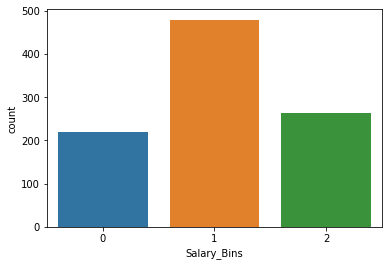

In [22]:
sns.countplot(salary_df.Salary_Bins)

array([[<AxesSubplot:title={'center':'adjusted_yearly_salary'}>]],
      dtype=object)

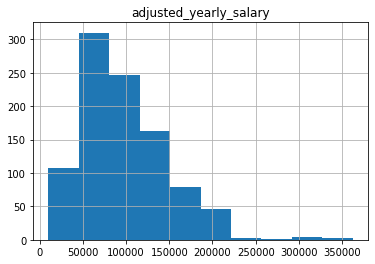

In [23]:
salary_df.hist('adjusted_yearly_salary')

In [24]:
salary_df['adjusted_yearly_salary'].quantile(list(np.linspace(0,1,7)))

0.000000     10000.000000
0.166667     54026.666667
0.333333     70000.000000
0.500000     90000.000000
0.666667    114400.000000
0.833333    145600.000000
1.000000    362500.000000
Name: adjusted_yearly_salary, dtype: float64

In [25]:
salary_df.head(2)

,Title,Company,Link,Review,Salary,Description,Rate_by,low,high,min,max,adjusted_salary,adjusted_yearly_salary,Salary_Bins
0,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,0,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,Yearly,"Up to $215,000 a year",0,215000.0,0.0,215000.0,215000.0,2
1,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,0,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,Yearly,"$60,000 a year",0,60000.0,0.0,60000.0,60000.0,0


In [26]:
salary_df.shape

(963, 14)

In [27]:
salary_df['combined_text'] = salary_df['Title'].str.cat(salary_df['Description'], sep = ' ')

In [28]:
salary_df.head(2)

,Title,Company,Link,Review,Salary,Description,Rate_by,low,high,min,max,adjusted_salary,adjusted_yearly_salary,Salary_Bins,combined_text
0,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,0,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,Yearly,"Up to $215,000 a year",0,215000.0,0.0,215000.0,215000.0,2,"2021048 Data Scientist $215,000.00 Position Re..."
1,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,0,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,Yearly,"$60,000 a year",0,60000.0,0.0,60000.0,60000.0,0,Data Science/Data Analyst Cost Readiness Analy...


In [29]:
salary_df.shape

(963, 15)

In [30]:
salary_df = salary_df[['Title', 'Company', 'Link', 'Review', 'Salary', 'Description',
       'Rate_by', 'low', 'high', 'min', 'max', 'adjusted_salary',
       'adjusted_yearly_salary',  'combined_text','Salary_Bins']]

In [31]:
# salary_df.to_csv('job_scrapped_preprocess2.csv',index=False)